In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
train=pd.read_excel("Data-Train.xlsx")
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
test=pd.read_excel("Data-Test.xlsx")
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [4]:
train.shape, test.shape


((12690, 9), (4231, 8))

In [5]:
train.head()


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


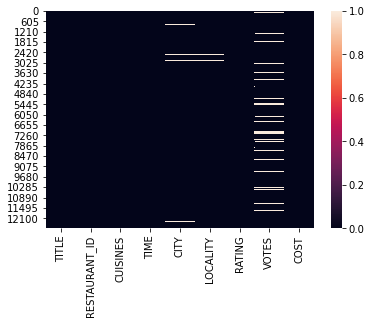

In [7]:
sns.heatmap(train.isnull())

In [8]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())


Unique values in TITLE 113
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


# Preprocessing of Dataset

In [9]:
df = train.append(test,ignore_index=True)


In [10]:
df = df[['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST']]


In [11]:
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

df['CLOSED'] = df['TIME'].apply(extract_closed)


In [12]:
df['TIME'] = df['TIME'].str.replace(r'Closed \(.*?\)','')


In [13]:
df['RATING'] = df['RATING'].str.replace('NEW', '1')
df['RATING'] = df['RATING'].str.replace('-', '1').astype(float)


In [14]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)


In [15]:
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)  
df['RATING'].fillna(3.8, inplace=True)  
df['VOTES'].fillna(0.0, inplace=True)


In [16]:
df['COST'] = df['COST'].astype(float)


In [17]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,NA
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,NA
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,NA


In [18]:
df['TITLE'].nunique(), df['CUISINES'].nunique()


(123, 5183)

In [19]:
calc_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
df = df.merge(calc_mean, on=['CITY'],how='left')

calc_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
df = df.merge(calc_mean, on=['LOCALITY'],how='left')


In [20]:
df.head(2)


,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,3.376271,3.388889
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.584588,3.472222


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_title = tf1.fit_transform(df['TITLE'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf1.get_feature_names())

tf2 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisines = tf2.fit_transform(df['CUISINES'])
df_cuisines = pd.DataFrame(data=df_cuisines.toarray(), columns=tf2.get_feature_names())

tf3 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_city = tf3.fit_transform(df['CITY'])
df_city = pd.DataFrame(data=df_city.toarray(), columns=tf3.get_feature_names())

tf4 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_locality = tf4.fit_transform(df['LOCALITY'])
df_locality = pd.DataFrame(data=df_locality.toarray(), columns=tf4.get_feature_names())

tf5 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_time = tf5.fit_transform(df['TIME'])
df_time = pd.DataFrame(data=df_time.toarray(), columns=tf5.get_feature_names())


In [22]:
df.head(2)


,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,3.376271,3.388889
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.584588,3.472222


In [23]:
df = pd.concat([df, df_title, df_cuisines, df_city, df_locality, df_time], axis=1) 
df.drop(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'TIME'], axis=1, inplace=True)


In [24]:
df = pd.get_dummies(df, columns=['CLOSED'], drop_first=True)


In [25]:
df.shape


(16921, 2285)

In [26]:
train_df = df[df['COST'].isnull()!=True]
test_df = df[df['COST'].isnull()==True]
test_df.drop('COST', axis=1, inplace=True)


In [27]:
train_df.shape, test_df.shape


((12690, 2285), (4231, 2284))

In [28]:
train_df['COST'] = np.log1p(train_df['COST'])


# train and test split of dataset

In [29]:
X = train_df.drop(labels=['COST'], axis=1)
y = train_df['COST'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)


In [30]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape


((9517, 2284), (9517,), (3173, 2284), (3173,))

# Building the Model

In [31]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error


In [32]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, n_estimators=30, max_samples=0.9, max_features=1.0, bootstrap=True, 
                      bootstrap_features=True, oob_score=True, warm_start=False, n_jobs=1, random_state=42, verbose=1)
br.fit(X_train, y_train)
y_pred_br = br.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred_br))))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSLE: 0.35889807962931003


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


# Predict on test set

In [33]:
Xtest = test_df


In [34]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor

err_br = []
y_pred_totbr = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    br = BaggingRegressor(base_estimator=None, n_estimators=30, max_samples=1.0, max_features=1.0, bootstrap=True,
                          bootstrap_features=True, oob_score=False, warm_start=False, n_jobs=1, random_state=42, verbose=0)
    
    br.fit(X_train, y_train)
    y_pred_br = br.predict(X_test)

    print("RMSE BR:", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_br))))

    err_br.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_br))))
    p = br.predict(Xtest)
    y_pred_totbr.append(p)


RMSE BR: 0.3604225466162505
RMSE BR: 0.3606867271762973
RMSE BR: 0.34840054065618664
RMSE BR: 0.3511785117383026
RMSE BR: 0.3412423764840244
RMSE BR: 0.3324498158689537
RMSE BR: 0.3627368477369282
RMSE BR: 0.3781163629013975
RMSE BR: 0.35734481021927217
RMSE BR: 0.34075710028279965
RMSE BR: 0.3451173859037766
RMSE BR: 0.3592734017580756
RMSE BR: 0.34009318446171727
RMSE BR: 0.3571125481490086
RMSE BR: 0.37301396435914974


In [35]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

err_rf = []
y_pred_totrf = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestRegressor(n_estimators=40, criterion='mse', max_depth=None, min_samples_split=4, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
                           random_state=42, verbose=0, warm_start=False)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print("RMSE RF: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))

    err_rf.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))
    p = rf.predict(Xtest)
    y_pred_totrf.append(p)


RMSE RF:  0.367643040550238
RMSE RF:  0.36746611594287887
RMSE RF:  0.35310503109148267
RMSE RF:  0.35372806894090497
RMSE RF:  0.3435273136721323
RMSE RF:  0.3388947172550363
RMSE RF:  0.3737674369391258
RMSE RF:  0.37930885680835713
RMSE RF:  0.36485332107177315
RMSE RF:  0.3514014607260739
RMSE RF:  0.35644005008055707
RMSE RF:  0.3613770579766431
RMSE RF:  0.34970383718881143
RMSE RF:  0.36668063332812095
RMSE RF:  0.37461126547894136


In [37]:
 np.mean(err_br,0), np.mean(err_rf,0)


(0.35386307495414276, 0.36016721380340516)

In [39]:

br_final = np.exp(np.mean(y_pred_totbr,0))
rf_final = np.exp(np.mean(y_pred_totrf,0))

In [40]:
y_pred = ( br_final*0.215 + rf_final*.15) 
y_pred


array([400.18283101, 149.74912013, 233.10971415, ..., 146.87025324,
        91.90591074, 133.15625857])